In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#EDA步骤：
#1.读取数据
#2.查看数据结构
#3.查看数据的基本统计信息
#4.查看数据之间依赖关系
#5.数据清洗
#6.数据分析

In [55]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
train.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
3545,3807_01,Earth,True,G/623/S,TRAPPIST-1e,18.0,False,0.0,0.0,0.0,0.0,0.0,Benew Barnolaney,True
5376,5740_02,Europa,False,A/52/P,55 Cancri e,32.0,False,70.0,764.0,724.0,547.0,1297.0,Unukath Alaxed,False
2687,2878_01,Mars,False,F/593/P,TRAPPIST-1e,42.0,False,44.0,0.0,3648.0,0.0,9.0,Grey Ancy,True
1814,1938_01,Earth,False,F/369/S,TRAPPIST-1e,36.0,False,0.0,0.0,1508.0,110.0,117.0,Gretty Charpelaney,True
4251,4521_01,Earth,False,F/929/P,TRAPPIST-1e,18.0,False,1.0,1.0,0.0,0.0,746.0,Jessa Oneidson,False


In [56]:
test.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
2670,5873_02,Earth,True,G/952/P,TRAPPIST-1e,37.0,False,0.0,0.0,0.0,0.0,0.0,Kenda Acobsond
4093,8912_01,Earth,True,G/1443/P,PSO J318.5-22,33.0,False,0.0,0.0,0.0,0.0,0.0,Dord Pernard
4107,8925_05,Europa,True,C/295/P,TRAPPIST-1e,36.0,False,0.0,0.0,0.0,0.0,0.0,Winons Pabler
199,0420_01,Earth,False,F/95/P,TRAPPIST-1e,49.0,False,189.0,NaN,0.0,882.0,0.0,Sethew Kellson
3334,7295_02,Earth,False,E/470/P,TRAPPIST-1e,47.0,False,1095.0,320.0,1015.0,0.0,0.0,Elene Buckentry


In [57]:
#查看数据结构
train[["groupId", "groupPassengerId"]] = train["PassengerId"].str.split("_", expand=True).astype(int)
train[["deck", "num", "side"]] = train["Cabin"].str.split("/", expand=True)
train[["totalSpending"]] = train[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)
test[["groupId", "groupPassengerId"]] = test["PassengerId"].str.split("_", expand=True).astype(int)
test[["deck", "num", "side"]] = test["Cabin"].str.split("/", expand=True)
test[["totalSpending"]] = test[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       8693 non-null   object 
 1   HomePlanet        8492 non-null   object 
 2   CryoSleep         8476 non-null   object 
 3   Cabin             8494 non-null   object 
 4   Destination       8511 non-null   object 
 5   Age               8514 non-null   float64
 6   VIP               8490 non-null   object 
 7   RoomService       8512 non-null   float64
 8   FoodCourt         8510 non-null   float64
 9   ShoppingMall      8485 non-null   float64
 10  Spa               8510 non-null   float64
 11  VRDeck            8505 non-null   float64
 12  Name              8493 non-null   object 
 13  Transported       8693 non-null   bool   
 14  groupId           8693 non-null   int32  
 15  groupPassengerId  8693 non-null   int32  
 16  deck              8494 non-null   object 


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       4277 non-null   object 
 1   HomePlanet        4190 non-null   object 
 2   CryoSleep         4184 non-null   object 
 3   Cabin             4177 non-null   object 
 4   Destination       4185 non-null   object 
 5   Age               4186 non-null   float64
 6   VIP               4184 non-null   object 
 7   RoomService       4195 non-null   float64
 8   FoodCourt         4171 non-null   float64
 9   ShoppingMall      4179 non-null   float64
 10  Spa               4176 non-null   float64
 11  VRDeck            4197 non-null   float64
 12  Name              4183 non-null   object 
 13  groupId           4277 non-null   int32  
 14  groupPassengerId  4277 non-null   int32  
 15  deck              4177 non-null   object 
 16  num               4177 non-null   object 


In [60]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,groupId,groupPassengerId,totalSpending
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,4633.389624,1.517773,1440.866329
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2671.028856,1.054241,2803.045694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.000000,1.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4630.000000,1.000000,716.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,6883.000000,2.000000,1441.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000,8.000000,35987.000000


In [61]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,groupId,groupPassengerId,totalSpending
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,4277.000000,4277.000000,4277.00000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031,4639.296469,1.498714,1417.68202
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742,2716.197368,1.018221,2816.40210
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.00000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2249.000000,1.000000,0.00000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4639.000000,1.000000,714.00000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000,7030.000000,2.000000,1444.00000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000,9277.000000,8.000000,33666.00000


In [62]:
sns.set_style('whitegrid')

<Figure size 864x576 with 0 Axes>

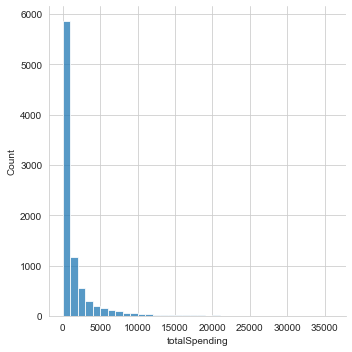

In [63]:
plt.figure(figsize=(12, 8))
sns.displot(train, x=train['totalSpending'], binwidth=1000, bins=35)

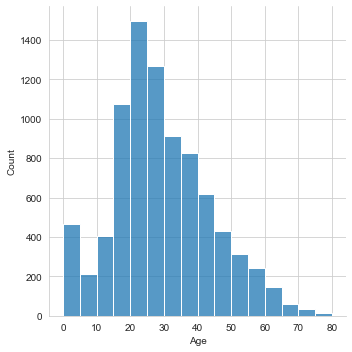

In [64]:
sns.displot(train, x=train['Age'], binwidth=5, bins=20)

In [65]:
num_cols = train._get_numeric_data().columns
cat_cols = list(set(train.columns) - set(num_cols))
print(num_cols, cat_cols)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'groupId', 'groupPassengerId', 'totalSpending'],
      dtype='object') ['HomePlanet', 'Cabin', 'deck', 'PassengerId', 'VIP', 'side', 'Name', 'CryoSleep', 'Destination', 'num']


D:\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the 

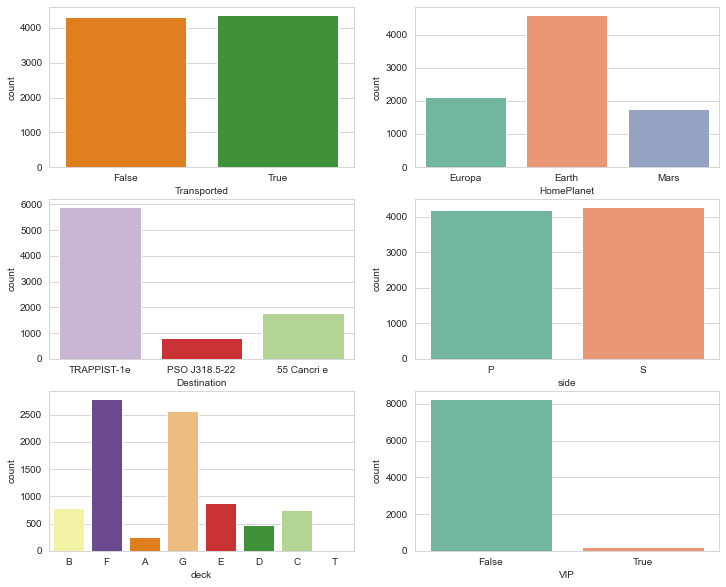

In [66]:
fig, ax = plt.subplots(3, 2, figsize=(12, 10))
sns.countplot(train['Transported'], palette='Paired_r', ax=ax[0][0])
sns.countplot(train['HomePlanet'], palette='Set2', ax=ax[0][1])
sns.countplot(train['Destination'], palette='Paired_r', ax=ax[1][0])
sns.countplot(train['side'], palette='Set2', ax=ax[1][1])
sns.countplot(train['deck'], palette='Paired_r', ax=ax[2][0])
sns.countplot(train['VIP'], palette='Set2', ax=ax[2][1])
plt.show()

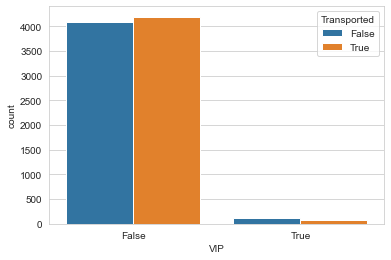

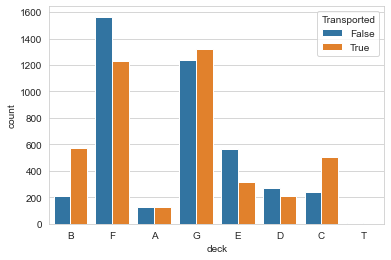

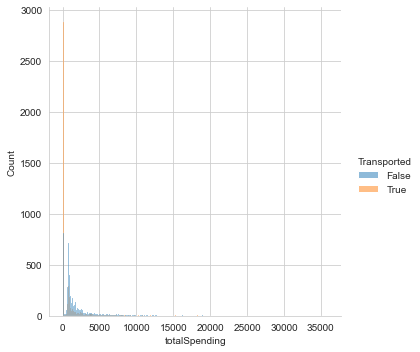

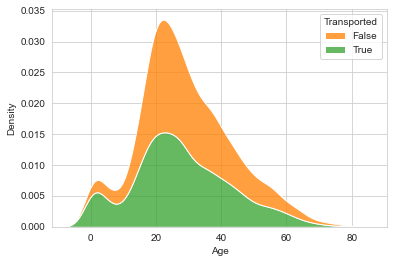

<AxesSubplot:xlabel='side', ylabel='count'>

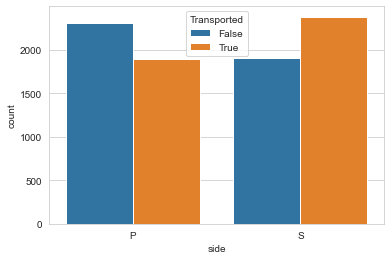

In [67]:
sns.countplot(x=train['VIP'], hue=train['Transported'])
plt.show()
sns.countplot(x=train.deck, hue=train.Transported)
plt.show()
sns.displot(x=train.totalSpending, hue=train.Transported)
plt.show()
sns.kdeplot(x=train.Age, hue=train.Transported, palette='Paired_r', multiple='stack')
plt.show()
sns.countplot(x=train.side, hue=train.Transported)
#查看变量和类别关系

In [68]:
from sklearn.preprocessing import LabelEncoder

initialobserved = train[['side', 'Transported']]
for col in initialobserved.columns:
    initialobserved[col] = LabelEncoder().fit_transform(initialobserved[col])

count = pd.DataFrame(index=['Transported', 'Not Transported'], columns=['Port', 'Starboard'], dtype=int)


def createCount(row):
    counttp = 0
    countts = 0
    countntp = 0
    countnts = 0
    if row['side'] == 0 and row['Transported'] == 1:
        counttp += 1
    if row['side'] == 1 and row['Transported'] == 1:
        countts += 1
    if row['side'] == 0 and row['Transported'] == 0:
        countntp += 1
    if row['side'] == 1 and row['Transported'] == 0:
        countnts += 1
    return counttp, countts, countntp, countnts


initialobserved = initialobserved.apply(lambda row: createCount(row), axis=1)

observed = pd.DataFrame(initialobserved.tolist(), index=initialobserved.index)

count['Port']['Transported'] = observed[0].sum(axis=0).astype(int)
count['Starboard']['Transported'] = observed[1].sum(axis=0).astype(int)
count['Port']['Not Transported'] = observed[2].sum(axis=0).astype(int)
count['Starboard']['Not Transported'] = observed[3].sum(axis=0).astype(int)

C:\Users\10670\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<AxesSubplot:>

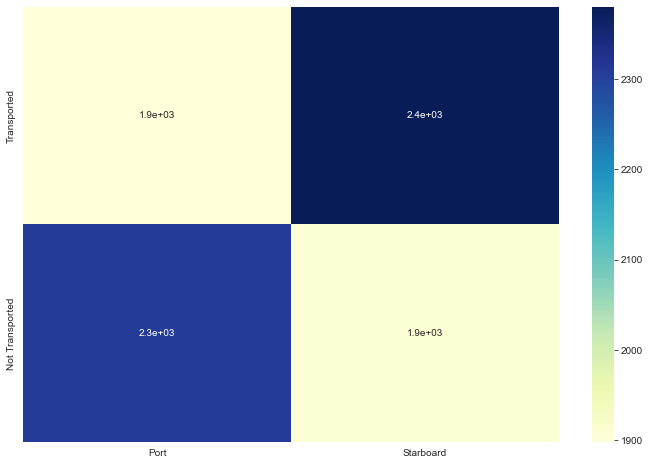

In [69]:
plt.figure(figsize=(12, 8))
sns.heatmap(count, annot=True, cmap="YlGnBu")

In [70]:
from scipy.stats import chi2_contingency

c, p, dof, expected = chi2_contingency(count)
if p < .05:
    print('p = ' + str(p) + ' 小于0.5%, 说明船舷和船上的人数存在依赖关系')
if p > .05:
    print('p = ' + str(p) + ' 大于0.5%, 说明船舷和船上的人数不存在依赖关系')

p = 1.3940936254458288e-21 小于0.5%, 说明船舷和船上的人数存在依赖关系


In [71]:
#数据清洗
print("数据清洗，查看缺失值")
print(train.isnull().sum())

数据清洗，查看缺失值
PassengerId           0
HomePlanet          201
CryoSleep           217
Cabin               199
Destination         182
Age                 179
VIP                 203
RoomService         181
FoodCourt           183
ShoppingMall        208
Spa                 183
VRDeck              188
Name                200
Transported           0
groupId               0
groupPassengerId      0
deck                199
num                 199
side                199
totalSpending         0
dtype: int64


In [72]:
from sklearn.preprocessing import OneHotEncoder  #编码
from sklearn.preprocessing import StandardScaler  #标准化
from sklearn.pipeline import Pipeline  #管道
from sklearn.pipeline import make_pipeline  #
from sklearn.impute import KNNImputer  #KNN填充缺失值
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

Categorical_Cleaner = Pipeline(steps=[('imputer', KNNImputer())])#KNN填充缺失值，用管线填充类别型
Numerical_Cleaner = Pipeline(steps=[('imputer', KNNImputer())])#KNN填充缺失值，用管线填充数值型

In [98]:
from sklearn.model_selection import train_test_split

y = train['Transported']  #目标值
y = pd.DataFrame(LabelEncoder().fit_transform(y))  #编码为0、1，0表示未被搬运，1表示被搬运
features = ['deck', 'VIP', 'groupPassengerId',
            'CryoSleep', 'groupId', 'Destination',
            'HomePlanet', 'side', 'Age',
            'totalSpending']  #特征
X = train[features]#数据集
s = (X.dtypes == 'object')  #字符串类型
object_cols = list(s[s].index)
num_cols = X._get_numeric_data().columns
for object_col in object_cols:
    X[object_col] = LabelEncoder().fit_transform(X[object_col])  #类别编码,转换为数值型
X[object_cols] = Categorical_Cleaner.fit_transform(X[object_cols])  #填充缺失值
X[num_cols] = Numerical_Cleaner.fit_transform(X[num_cols])  #填充缺失值
X['totalSpending'].array

C:\Users\10670\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\10670\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
D:\python\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


<PandasArray>
[    0.0,   736.0, 10383.0,  5176.0,  1091.0,   774.0,  1584.0,     0.0,
  1018.0,     0.0,
 ...
   775.0,     0.0,     0.0,  1231.0,  3540.0,  8536.0,     0.0,  1873.0,
  4637.0,  4826.0]
Length: 8693, dtype: float64